In [9]:
from tramway.helper.tessellation import *
from tramway.helper.inference import *
from tramway.plot.mesh import plot_delaunay
import matplotlib.pyplot as plt
from scipy.stats import skellam
from scipy.optimize import fmin,minimize

## script main parameters ##

positions_file = '/Users/cvesterg/ownCloud/Random walks/Mapping without tracking/BP_data/Rac1/15_06_2016/reference/c01.txt'
positions_file = '/Users/cvesterg/ownCloud/Random walks/Mapping without tracking/BP_data/MWT_Rac1/4/trajectories.txt'
trajectories_bool=True

tessellation_method = 'hexagon'
# average number of locations per cell
#location_count = 10
# minimum number of locations per cell
#min_location_count = 2
# start and end times to consider for fit
#t_start=1.00; t_end=1.04

# in the same unit as in the trajectory file (here in micrometers)
ref_distance=0.1
localization_error = 0.03
dt=0.04
#jeffreys_prior = False
#diffusivity_smoothing
# keep it low otherwise the inference will take days
max_iter = 100


############################

rwa_file = os.path.splitext(positions_file)[0]+'.rwa'
mesh_label = '{}'.format(tessellation_method) #, location_count, min_location_count)
#maps_label = 'sigma_{}_d_{}_v_{}_j_{:d}'.format(round(localization_error*1e3), diffusivity_smoothing, potential_smoothing, int(jeffreys_prior))

############################

positions_all=load_xyt(positions_file)
if trajectories_bool==True:
    positions_all=positions_all.drop(['n'],axis=1)
else:
    positions_all=positions_all.drop(['t'],axis=1)
    positions_all.columns=(['x','y','t'])
r_t=positions_all
#r_t=r_t.drop(['n'],axis=1)
#r_t.head()
r_t.tail()

,x,y,t
192416,55.842202,37.842150,20.76
192417,56.246002,40.870658,20.72
192418,55.911827,40.626003,20.76
192419,70.994314,21.779736,20.72
192420,70.677462,21.671430,20.76


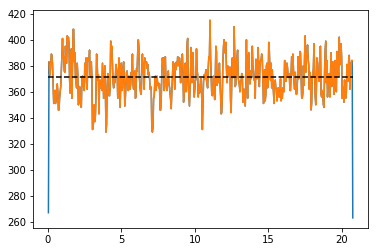

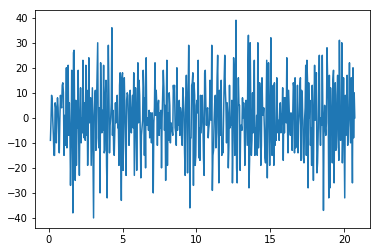

0.001937984496124031


In [4]:
ts=np.sort(list(set(r_t['t'])))
N_t=np.array([len(r_t[r_t['t']==t_].index) for t_ in ts])
plt.plot(ts,N_t)
plt.plot(ts[1:-1],N_t[1:-1])
plt.plot([ts[0],ts[-1]],np.average(N_t[1:-1])*np.ones(2),'k--')
plt.show()

Deltas=np.diff(N_t[1:-1])
plt.plot(ts[2:-1],Deltas)
plt.show()
print(np.average(Deltas))

Optimization terminated successfully.
         Current function value: 2089.864524
         Iterations: 47
         Function evaluations: 90


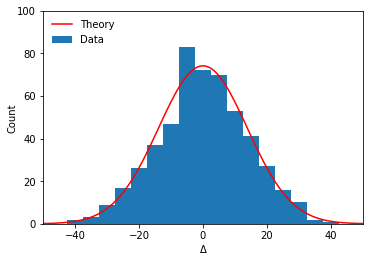

96.4809296249 96.4789899237 0.259937348758


In [6]:
def mlnL_Deltas2(mus_,Deltas_):
    mu_on=mus_[0]
    mu_off=mus_[1]
    return -sum([np.log(skellam.pmf(Delta,mu_on,mu_off)) for Delta in Deltas_])

mu_on,mu_off=fmin(mlnL_Deltas2,x0=[100.,100.],args=(Deltas,))
p_off=mu_off/np.average(N_t[1:-1])

x_D=np.arange(np.floor(min(Deltas)),max(Deltas),1)
x_D=np.arange(-50,51,1)
h=5
bins=np.arange(-50-h/2.,51,h)

F=plt.figure()
#F.set_size_inches(3.375*0.5,1.5)
plt.axes([0.22,0.22,0.74,0.74])
plt.hist(Deltas,label='Data',bins=bins)
plt.plot(x_D,h*len(Deltas)*skellam.pmf(x_D,mu_on,mu_off),'r',label='Theory')
plt.legend(loc=2,frameon=False)
plt.xlabel(r'$\Delta$',labelpad=2)
plt.ylabel(r'Count',labelpad=0)
plt.axis([-50,50,0,100])
plt.show()

mu_on=96.4809296249 
mu_off=96.4789899237
p_off=0.259937348758

print(mu_on,mu_off,p_off)

In [19]:
t_start=10.04
t_end=11.04

if t_end==0.0:
    r_t=positions_all
else:
    r_t=positions_all[(positions_all['t']>=t_start)&(positions_all['t']<=t_end)]
#r_t

xlims=(10.,60.)
ylims=(15.,65.)
xlims=(40.,50.)
ylims=(30.,40.)
r_t=r_t[(r_t['x']>=xlims[0]) & (r_t['x']<=xlims[1]) & (r_t['y']>=ylims[0]) & (r_t['y']<=ylims[1])]
r_t

,x,y,t
91675,46.046186,36.346973,10.04
91681,45.343600,37.248835,10.04
91682,45.404782,37.260096,10.08
91714,48.934984,36.642979,10.04
91715,48.835901,36.669659,10.08
92004,40.639416,39.964347,10.04
92015,41.268704,32.668170,10.04
92016,41.368763,32.641606,10.08
92017,41.360091,32.716210,10.12
92018,41.492798,32.700205,10.16


In [20]:
ref_distance = 2. # [mu]
min_loc_count=0
tessellation_method = 'hexagon'
cells = tessellate(r_t, tessellation_method, ref_distance=ref_distance, min_location_count=0,\
           strict_min_location_count=min_loc_count, #output_file=rwa_file,\
           force=True, output_label=mesh_label)


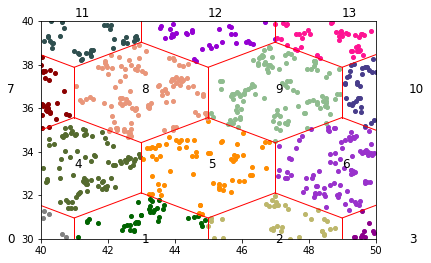

In [21]:
# cell_plot(rwa_file,output_file='Positions_'+tessellation_method+\
#          ',x=['+str(xlims[0])+','+str(xlims[1])+']mum,y=['+str(ylims[0])+','+str(ylims[1])+']mum,'+\
#          str(2.*ref_distance)+'mum,t=['+str(t_start)+','+str(t_end)+']s.png') 
cell_plot(cells, show=True, cell_indices=True)


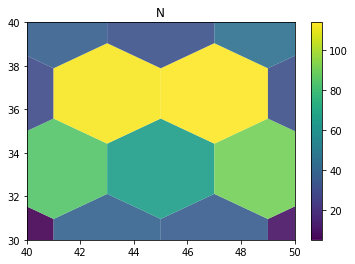

In [33]:
#analysis_tree = load_rwa(rwa_file)
analysis_tree = Analyses(r_t)
analysis_tree.add(cells, label='hexagon')

cells = analysis_tree[mesh_label].data
map_plot((pd.DataFrame(cells.location_count, columns=['N'])),cells=cells) #,cmap='inferno') 
# map_plot((pd.DataFrame(cells.location_count, columns=['N'])),cells=cells,output_file='Location_count,'+tessellation_method+\
#          ',x=['+str(xlims[0])+','+str(xlims[1])+']mum,y=['+str(ylims[0])+','+str(ylims[1])+']mum,'+\
#          str(2.*ref_distance)+'mum,t=['+str(t_start)+','+str(t_end)+']s.png')

In [32]:
#runtime=time()
infer(cells, 'nT_test02_hex', new_cell=Locations, dt=0.04, p_off=p_off, mu_on=mu_on,\
        method='NM', tol=1e-2)
print("\n Done!") #, time()-runtime, "s")


S: 0 13.856406460551018
1 13.856406460551018
4 27.712812921102035
; total: 41.569219381653056 mu^2
Cell no.: 0 ; sum(N): 5 , possible links: 3 , avg(N): 0.19230769230769232
Outer cells: sum(N): 124 , possible links: 104 , avg(N): 4.769230769230769
All cells: sum(N): 129 , possible links: 108 , avg(N): 4.961538461538462
[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[6, 6, 5, 7, 7, 5, 6, 5, 6, 8, 6, 5, 3, 4, 3, 4, 3, 5, 5, 5, 3, 4, 4, 5, 3, 6]
 final_simplex: (array([[0.32789627, 0.32431015],
       [0.31909668, 0.32787598],
       [0.32429077, 0.32008911]]), array([245.84364325, 245.84417148, 245.84444839]))
           fun: 245.84364325235927
       message: 'Optimization terminated successfully.'
          nfev: 37
           nit: 19
        status: 0
       success: True
             x: array([0.32789627, 0.32431015])
D corrected for motion blur and localization error: 0.39809440612792824
49.28990197181702 s

S: 1 13.856406460551018
0 13.8564064605510

KeyboardInterrupt: 

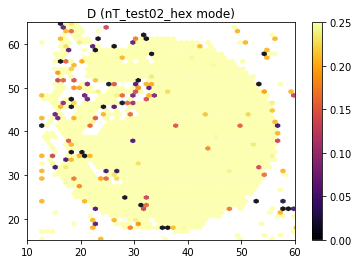

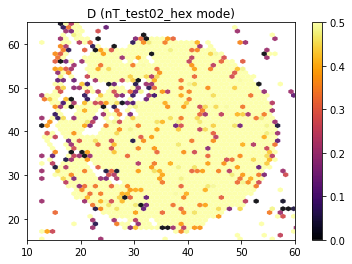

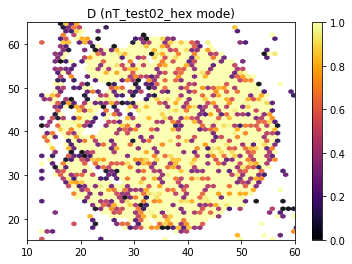

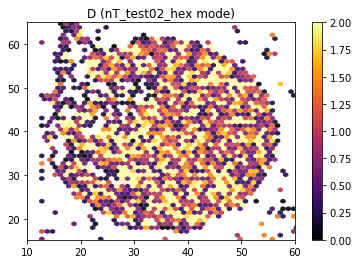

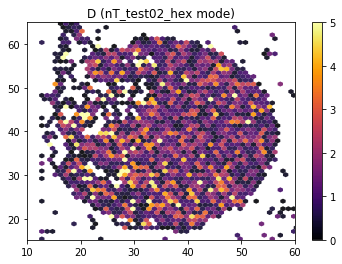

In [39]:
for up_lim in [0.25,0.5,1.,2.,5.]:
    map_plot(rwa_file,cmap='inferno',clim=[0,up_lim], output_file='BP_2zones,'+tessellation_method+\
         ',x=['+str(xlims[0])+','+str(xlims[1])+']mum,y=['+str(ylims[0])+','+str(ylims[1])+']mum,'+\
         str(2.*ref_distance)+'mum,t=['+str(t_start)+','+str(t_end)+']s,lim='+str(up_lim)+\
             '.png') 
    map_plot(rwa_file,cmap='inferno',clim=[0,up_lim]) 

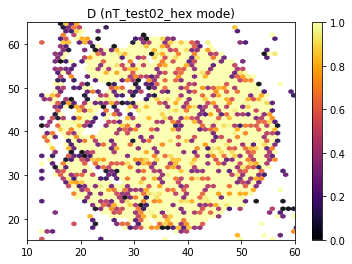

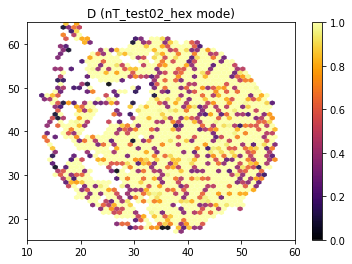

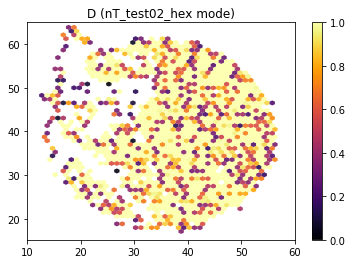

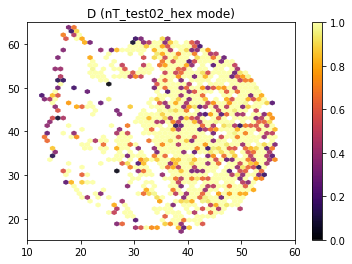

In [40]:
analysis_tree = load_rwa(rwa_file)
cells = analysis_tree[mesh_label].data
maps = analysis_tree[mesh_label][0].data
#maps.maps = maps.maps.loc[5<cells.location_count]

up_lim=1.
for min_loc_count in [0,5,10,20]:
    cells.tessellation.cell_label = min_loc_count<cells.location_count
    map_plot(maps,cells=cells,cmap='inferno',clim=[0,up_lim], output_file='BP_2zones,'+tessellation_method+\
         ',x=['+str(xlims[0])+','+str(xlims[1])+']mum,y=['+str(ylims[0])+','+str(ylims[1])+']mum,'+\
         str(2.*ref_distance)+'mum,t=['+str(t_start)+','+str(t_end)+']s,lim='+str(up_lim)+\
             ',min_count='+str(min_loc_count)+'.png') 
    map_plot(maps,cells=cells,cmap='inferno',clim=[0,up_lim]) 